In [7]:
#今作成しているコード（TimeSeriesKMeans）
import pandas as pd
import numpy as np
import os
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt

# フォルダパスの設定
folder_path = "C:\\Users\\miyazakipc\\Desktop\\2024年9月10日　実験\\てすりとキネクト（てすり）\\データ分析\\分析用抽出データ"

# 新しい保存先フォルダの設定
save_folder_path = "C:\\Users\\miyazakipc\\Desktop\\2024年9月10日　実験\\てすりとキネクト（てすり）\\データ分析\\ラベル付きデータ"
os.makedirs(save_folder_path, exist_ok=True)

# すべてのCSVファイルのパスを取得
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# 全てのファイルのデータを格納するリスト
all_data = []

# 各ファイルから座標データを読み込み、リストに追加
for file in file_list:
    data = pd.read_csv(file)
    xyz_data = data[['2', '3', '4']].values
    all_data.append(xyz_data)
   
# リスト内の各配列を横に結合して (41, 90) にする
all_data_combined = np.hstack(all_data)  # Shape: (41, 90)
print(f"Shape of all_data_combined: {all_data_combined.shape}")
#print(all_data_combined) ok


# 時系列データを正規化し、(41, 90, 1)から(41, 90)に変換
scaler = TimeSeriesScalerMeanVariance()
all_data_scaled = scaler.fit_transform(all_data_combined).reshape(41, 90)
print(f"Shape of all_data_scaled: {all_data_scaled.shape}")



# TimeSeriesKMeansによるクラスタリング (DTW距離を使用、クラスター数k=3の例)
n_clusters = 3
model = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=0, n_init=10)
labels = model.fit_predict(all_data_scaled)

# クラスタラベルを各ファイルに追加して保存
for i, file in enumerate(file_list):
    data = pd.read_csv(file)
    data['ClusterLabel'] = labels[i]  # クラスタラベルを追加
    # 新しいファイル名を作成して保存
    new_file_name = os.path.join(save_folder_path, os.path.basename(file).replace(".csv", "lavel.csv"))
    data.to_csv(new_file_name, index=False)
    print(f"ファイル: {new_file_name} - クラスタ: {labels[i]} に保存しました。")

print("全てのファイルが正しく保存されました。")


Shape of all_data_combined: (41, 90)
Shape of all_data_scaled: (41, 90)
ファイル: C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\ラベル付きデータ\2024-09-10_181806.696765_force3_s1_normed_extractedlavel.csv - クラスタ: 1 に保存しました。
ファイル: C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\ラベル付きデータ\2024-09-10_181848.843142_force3_s1_normed_extractedlavel.csv - クラスタ: 1 に保存しました。
ファイル: C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\ラベル付きデータ\2024-09-10_181931.906833_force3_s1_normed_extractedlavel.csv - クラスタ: 1 に保存しました。
ファイル: C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\ラベル付きデータ\2024-09-10_181952.902847_force3_s1_normed_extractedlavel.csv - クラスタ: 1 に保存しました。
ファイル: C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\ラベル付きデータ\2024-09-10_182012.464040_force3_s1_normed_extractedlavel.csv - クラスタ: 1 に保存しました。
ファイル: C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\ラベル付きデータ\2024-09-10_182034.425371_force3_s1_normed_extractedlavel.csv - クラス

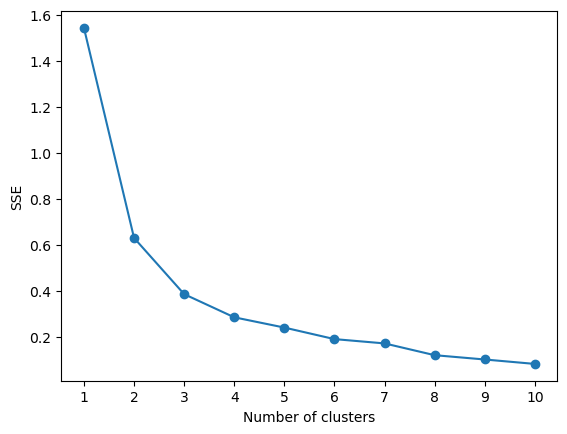

In [9]:
#エルボー法によるクラスタリング数の計算
distortions = [] 

for i in range(1,11): 
    ts_km = TimeSeriesKMeans(n_clusters=i,metric="dtw",random_state=0) 
    ts_km.fit_predict(all_data_scaled)
    distortions.append(ts_km.inertia_) 

plt.plot(range(1,11),distortions,marker="o") 
plt.xticks(range(1,11)) 
plt.xlabel("Number of clusters") 
plt.ylabel("SSE") 

# グラフの保存先ディレクトリ
graph_save_path = r"C:\\Users\\miyazakipc\\Desktop\\2024年9月10日　実験\\てすりとキネクト（てすり）\\データ分析\\TimeSeriesKMeans_Elbow.png"

# グラフの保存
plt.savefig(graph_save_path)
# グラフの表示
plt.show()

In [25]:
#クラスタラベル毎にプロット
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ラベル付きデータのフォルダパス
folder_path = "C:\\Users\\miyazakipc\\Desktop\\2024年9月10日　実験\\てすりとキネクト（てすり）\\データ分析\\ラベル付きデータ"

# グラフ保存先フォルダパス
save_folder_path ="C:\\Users\\miyazakipc\\Desktop\\2024年9月10日　実験\\てすりとキネクト（てすり）\\データ分析\\クラスタリング結果"
os.makedirs(save_folder_path, exist_ok=True)

# すべてのCSVファイルのパスを取得
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# クラスタラベルごとのファイルを格納する辞書
cluster_files = {}

# 各ファイルを読み込み、クラスタラベルに従って分類
for file in file_list:
    data = pd.read_csv(file)
    if 'ClusterLabel' in data.columns:
        # クラスタラベルを取得
        cluster_label = data['ClusterLabel'].iloc[0]
        
        # ラベルに応じてファイルを分類
        if cluster_label not in cluster_files:
            cluster_files[cluster_label] = []
        cluster_files[cluster_label].append(file)
    else:
        print(f"File {file} does not have the required 'ClusterLabel' column")

# カラーマップの設定
colors = cm.rainbow(np.linspace(0, 1, len(cluster_files)))

# クラスタラベルごとにプロット
for cluster_label, color in zip(cluster_files.keys(), colors):
    plt.figure(figsize=(12, 8))
    
    # 各ファイルに対してプロット
    for file in cluster_files[cluster_label]:
        data = pd.read_csv(file)
        if '0' in data.columns and '2' in data.columns and '3' in data.columns and '4' in data.columns:
            # Time列をdatetime型に変換
            data["0"] = pd.to_datetime(data["0"])
            # 時間分解能（間隔）を計算
            time_intervals = (data["0"] - data["0"].iloc[0]).dt.total_seconds()
            # 各軸の力データをプロット
            plt.plot(time_intervals, data["2"], color="r", alpha=0.8, label=f'Cluster {cluster_label} - Fx' if file == cluster_files[cluster_label][0] else "")
            plt.plot(time_intervals, data["3"], color="g", alpha=0.8, label=f'Cluster {cluster_label} - Fy' if file == cluster_files[cluster_label][0] else "")
            plt.plot(time_intervals, data["4"], color="b", alpha=0.8, label=f'Cluster {cluster_label} - Fz' if file == cluster_files[cluster_label][0] else "")
        else:
            print(f"File {file} does not have the required columns")
    
    # グラフのタイトルやラベルの設定
    plt.title(f'Cluster {cluster_label} - Force Data (Elements: {len(cluster_files[cluster_label])})', fontsize=16)
    plt.xlabel('Time (seconds)', fontsize=14)
    plt.ylabel('Force (N)', fontsize=14)
    plt.legend(loc='upper right', fontsize=15)
    plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
    
    # グラフを保存
    graph_save_path = os.path.join(save_folder_path, f'Cluster_{cluster_label}.png')
    plt.savefig(graph_save_path)
    plt.close()
    print(f"ファイルの存在確認: {os.path.exists(graph_save_path)}")  # True なら保存成功、Falseなら失敗
    print(f'グラフを {graph_save_path} に保存しました。')
    plt.close()

ファイルの存在確認: True
グラフを C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\クラスタリング結果\Cluster_1.png に保存しました。
ファイルの存在確認: True
グラフを C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\クラスタリング結果\Cluster_0.png に保存しました。
ファイルの存在確認: True
グラフを C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\クラスタリング結果\Cluster_2.png に保存しました。


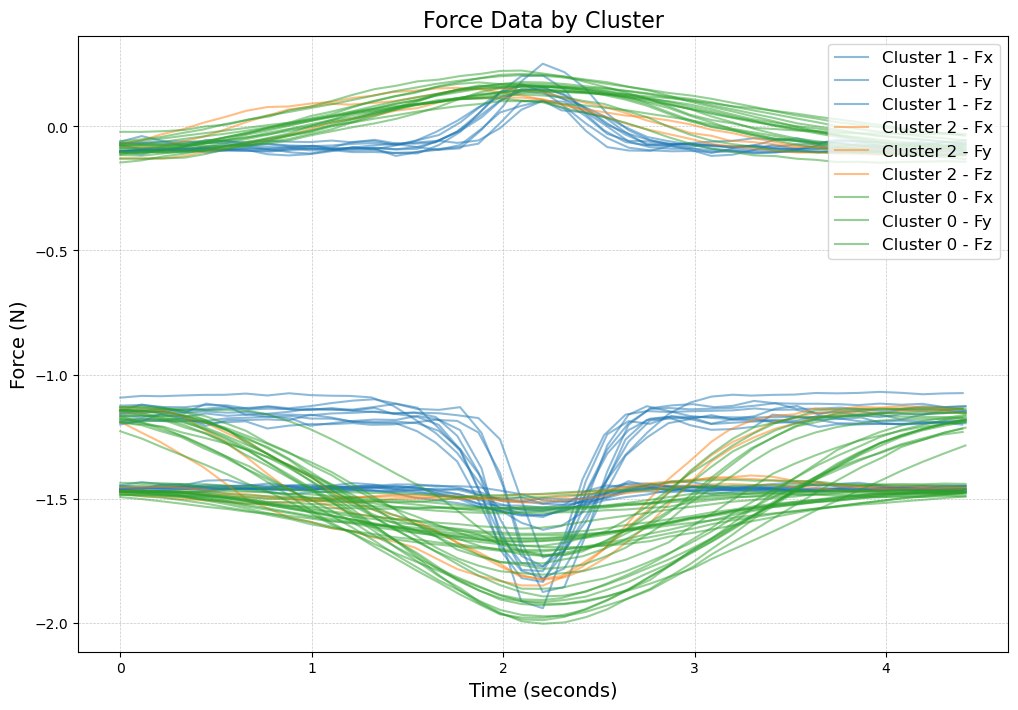

In [27]:
#全体プロット
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ラベル付きデータのフォルダパス
folder_path = 'C:\\Users\\miyazakipc\\Desktop\\2024年9月10日 実験\\てすりとキネクト（てすり）\\データ分析\\ラベル付きデータ'

# グラフ保存先フォルダパス
save_folder_path ="C:\\Users\\miyazakipc\\Desktop\\2024年9月10日　実験\\てすりとキネクト（てすり）\\データ分析\\クラスタリング結果"
os.makedirs(save_folder_path, exist_ok=True)

# すべてのCSVファイルのパスを取得
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# クラスタラベルごとのファイルを格納する辞書
cluster_files = {}

# 各ファイルを読み込み、クラスタラベルに従って分類
for file in file_list:
    data = pd.read_csv(file)
    if 'ClusterLabel' in data.columns:
        # クラスタラベルを取得
        cluster_label = data['ClusterLabel'].iloc[0]
        
        # ラベルに応じてファイルを分類
        if cluster_label not in cluster_files:
            cluster_files[cluster_label] = []
        cluster_files[cluster_label].append(file)
    else:
        print(f"File {file} does not have the required 'ClusterLabel' column")

# カラーマップの設定
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(len(cluster_files))]

# プロットの準備
plt.figure(figsize=(12, 8))

# クラスタラベルごとにプロット
for cluster_label, color in zip(cluster_files.keys(), colors):
    
    # 各ファイルに対してプロット
    for file in cluster_files[cluster_label]:
        data = pd.read_csv(file)
        if '0' in data.columns and '2' in data.columns and '3' in data.columns and '4' in data.columns:
            # Time列をdatetime型に変換
            data["0"] = pd.to_datetime(data["0"])
            # 時間分解能（間隔）を計算
            time_intervals = (data["0"] - data["0"].iloc[0]).dt.total_seconds()
            # 各軸の力データをプロット
            plt.plot(time_intervals, data["2"], color=color, alpha=0.5, label=f'Cluster {cluster_label} - Fx' if file == cluster_files[cluster_label][0] else "")
            plt.plot(time_intervals, data["3"], color=color, alpha=0.5, label=f'Cluster {cluster_label} - Fy' if file == cluster_files[cluster_label][0] else "")
            plt.plot(time_intervals, data["4"], color=color, alpha=0.5, label=f'Cluster {cluster_label} - Fz' if file == cluster_files[cluster_label][0] else "")
        else:
            print(f"File {file} does not have the required columns")

# グラフのタイトルやラベルの設定
plt.title('Force Data by Cluster', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Force (N)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
# グラフを保存
graph_save_path = os.path.join(save_folder_path, "all_cluster.png")
plt.savefig(graph_save_path)
plt.show()
plt.close()

In [33]:
#軸ごとにプロット
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# ラベル付きデータのフォルダパス
folder_path = 'C:\\Users\\miyazakipc\\Desktop\\2024年9月10日 実験\\てすりとキネクト（てすり）\\データ分析\\ラベル付きデータ'

# グラフ保存先フォルダパス
save_folder_path ="C:\\Users\\miyazakipc\\Desktop\\2024年9月10日　実験\\てすりとキネクト（てすり）\\データ分析\\クラスタリング結果"
os.makedirs(save_folder_path, exist_ok=True)

# すべてのCSVファイルのパスを取得
file_list = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# クラスタラベルごとのファイルを格納する辞書
cluster_files = {}

# 各ファイルを読み込み、クラスタラベルに従って分類
for file in file_list:
    data = pd.read_csv(file)
    if 'ClusterLabel' in data.columns:
        # クラスタラベルを取得
        cluster_label = data['ClusterLabel'].iloc[0]
        
        # ラベルに応じてファイルを分類
        if cluster_label not in cluster_files:
            cluster_files[cluster_label] = []
        cluster_files[cluster_label].append(file)
    else:
        print(f"File {file} does not have the required 'ClusterLabel' column")

# カラーマップの設定
cmap = plt.get_cmap('tab10')
colors = [cmap(i) for i in range(len(cluster_files))]

# プロットの準備
plt.figure(figsize=(12, 8))

# クラスタラベルごとにプロット
for cluster_label, color in zip(cluster_files.keys(), colors):
    
    # 各ファイルに対してプロット
    for file in cluster_files[cluster_label]:
        data = pd.read_csv(file)
        if '0' in data.columns and '2' in data.columns and '3' in data.columns and '4' in data.columns:
            # Time列をdatetime型に変換
            data["0"] = pd.to_datetime(data["0"])
            # 時間分解能（間隔）を計算
            time_intervals = (data["0"] - data["0"].iloc[0]).dt.total_seconds()
            # 各軸の力データをプロット
            #plt.plot(time_intervals, data["2"], color=color, alpha=0.5, label=f'Cluster {cluster_label} - Fx' if file == cluster_files[cluster_label][0] else "")
            #plt.plot(time_intervals, data["3"], color=color, alpha=0.5, label=f'Cluster {cluster_label} - Fy' if file == cluster_files[cluster_label][0] else "")
            plt.plot(time_intervals, data["4"], color=color, alpha=0.5, label=f'Cluster {cluster_label} - Fz' if file == cluster_files[cluster_label][0] else "")
        else:
            print(f"File {file} does not have the required columns")

# グラフのタイトルやラベルの設定
plt.title('Z axis Force Data by Cluster', fontsize=16)
plt.xlabel('Time (seconds)', fontsize=14)
plt.ylabel('Force (N)', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5, alpha=0.7)
# グラフを保存
graph_save_path = os.path.join(save_folder_path, "z_by_cluster.png")
plt.savefig(graph_save_path)
#plt.show()
plt.close()

In [39]:
"""
# クラスタリング評価（dtw）
from sklearn.metrics import silhouette_samples, silhouette_score
from tslearn.metrics import cdist_dtw
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# DTW距離行列の計算
dtw_distances = cdist_dtw(all_data_scaled)

# シルエットスコアの計算（三次元座標をそのまま使用。距離行列)
silhouette_avg = silhouette_score(dtw_distances, labels, metric="precomputed")
print(f'平均シルエットスコア: {silhouette_avg}')

# 各サンプルのシルエットスコアの計算
silhouette_vals = silhouette_samples(dtw_distances, labels, metric="precomputed")

# シルエット係数のグラフのプロット
cluster_labels = np.unique(labels)
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / max(n_clusters - 1, 1))
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    print(f"クラスタ {c}: 要素数 {len(c_silhouette_vals)}, シルエット係数 {c_silhouette_vals}")

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Coefficients by Cluster (DTW)')

# グラフの保存
save_path = "C:\\Users\\miyazakipc\\Desktop\\2024年9月10日　実験\\てすりとキネクト（てすり）\\データ分析\\Silhouette_coefficient.png"
plt.savefig(save_path)
print(f"シルエット係数のグラフを保存しました: {save_path}")
#plt.show()
plt.close()
"""

平均シルエットスコア: 0.49499809381413135
クラスタ 0: 要素数 17, シルエット係数 [0.03899339 0.04988081 0.07534337 0.10675381 0.29819539 0.32157374
 0.42671634 0.43188533 0.45410361 0.47400846 0.52094721 0.54198629
 0.55178046 0.55401275 0.55542134 0.58285238 0.59048901]
クラスタ 1: 要素数 19, シルエット係数 [0.08116769 0.14904269 0.31699968 0.37479145 0.47800785 0.52597892
 0.58478896 0.62637327 0.65078845 0.67269289 0.68032671 0.68807136
 0.69026514 0.6991965  0.6996888  0.70005345 0.70837675 0.71093254
 0.71401979]
クラスタ 2: 要素数 5, シルエット係数 [0.43518918 0.4654885  0.68360503 0.69114614 0.6929864 ]
シルエット係数のグラフを保存しました: C:\Users\miyazakipc\Desktop\2024年9月10日　実験\てすりとキネクト（てすり）\データ分析\Silhouette_coefficient.png


平均シルエットスコア: 0.6071959728816202
クラスタ 0: 要素数 17, シルエット係数 [0.08615629 0.09903203 0.15678958 0.26245993 0.4239899  0.52595018
 0.5286285  0.55119379 0.60126728 0.63335213 0.66077703 0.67456676
 0.69646916 0.69720458 0.70687135 0.72685696 0.72699493]
クラスタ 1: 要素数 19, シルエット係数 [0.07826259 0.24805853 0.42666657 0.52299962 0.61890556 0.67916039
 0.71641555 0.73267404 0.75176809 0.76115315 0.76815273 0.76824229
 0.77278928 0.78060325 0.79024401 0.79088054 0.79127162 0.79280138
 0.79434514]
クラスタ 2: 要素数 5, シルエット係数 [0.56897943 0.64405156 0.74061601 0.7969857  0.8004475 ]


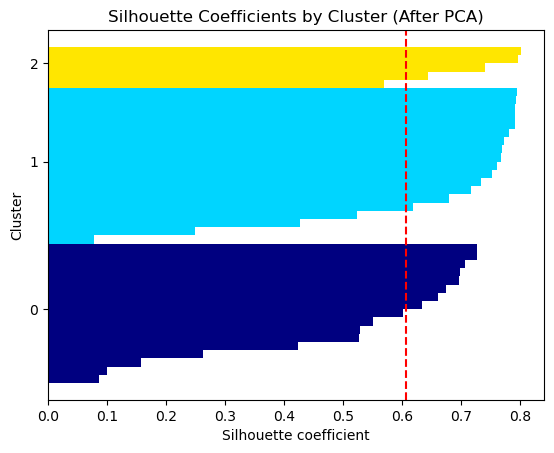

Calinski-Harabasz 指標: 100.88953763258283
Davies-Bouldin 指数: 0.47670292117107893


In [41]:
# クラスタリング評価
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
"""
# 各軸のデータを取り出して結合
x_data = all_data_scaled[:,:,0]
y_data = all_data_scaled[:,:,1]
z_data = all_data_scaled[:,:,2]

# データを結合してPCA入力用の2次元配列を作成
flattened_data = np.hstack((x_data, y_data, z_data))
print(f"Shape of flattened_data: {flattened_data.shape}")
"""
# PCAによる次元削減
pca = PCA(n_components=2)
all_data_pca = pca.fit_transform(all_data_scaled)

# シルエットスコアの計算
silhouette_avg = silhouette_score(all_data_pca, labels, metric='euclidean')
print(f'平均シルエットスコア: {silhouette_avg}')

# 各サンプルのシルエットスコアの計算
silhouette_vals = silhouette_samples(all_data_pca, labels, metric='euclidean')

# シルエット係数のグラフのプロット
"""
cluster_labels = np.unique(labels)
"""
n_clusters = cluster_labels.shape[0]
y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[labels == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)
    print(f"クラスタ {c}: 要素数 {len(c_silhouette_vals)}, シルエット係数 {c_silhouette_vals}")

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.title('Silhouette Coefficients by Cluster (After PCA)')
plt.savefig("C:\\Users\\miyazakipc\\Desktop\\2024年9月10日 実験\\てすりとキネクト（てすり）\\データ分析\\Silhouette_coefficient.png")
plt.show()

# CH指標の計算
ch_score = calinski_harabasz_score(all_data_pca, labels)
print(f'Calinski-Harabasz 指標: {ch_score}')

# デービーズ・ボルダイン指数の計算
db_index = davies_bouldin_score(all_data_pca, labels)
print(f'Davies-Bouldin 指数: {db_index}')